

---
# Chronology Protection via Quantum Extremal Islands

## 1. Introduction
In this notebook, we numerically verify the existence of **Quantum Extremal Islands** inside the chronology horizon of a time-identified Jackiw-Teitelboim (JT) gravity spacetime.

We aim to reproduce **Figure 3** from the paper and verify the specific numerical example:
* Central Charge $c = 12$
* Boundary Coupling $\phi_r = 1000 \, G$
* Time Identification $T = 10 \, G$


In [ ]:
import sys
import os

# 1. Clone the repository (if it doesn't exist locally yet)
if not os.path.exists('chronology-islands'):
    print("Cloning repository...")
    !git clone https://github.com/CodeMesh15/chronology-islands.git
else:
    print("Repository already exists. Pulling latest changes...")
    !cd chronology-islands && git pull

# 2. Add the repository to Python's path
# This allows 'from src.island_solver import ...' to work
repo_path = os.path.abspath('chronology-islands')
if repo_path not in sys.path:
    sys.path.append(repo_path)

# 3. Import your modules
import numpy as np
import matplotlib.pyplot as plt
from src.island_solver import IslandSolver

print("✅ Setup complete. Sourced code from GitHub: CodeMesh15/chronology-islands")
plt.style.use('seaborn-v0_8-paper')
plt.rcParams.update({'font.size': 12})

Cloning repository...
Cloning into 'chronology-islands'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 31 (delta 9), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 12.62 KiB | 2.52 MiB/s, done.
Resolving deltas: 100% (9/9), done.
✅ Setup complete. Sourced code from GitHub: CodeMesh15/chronology-islands


/tmp/ipython-input-661072550.py:60: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


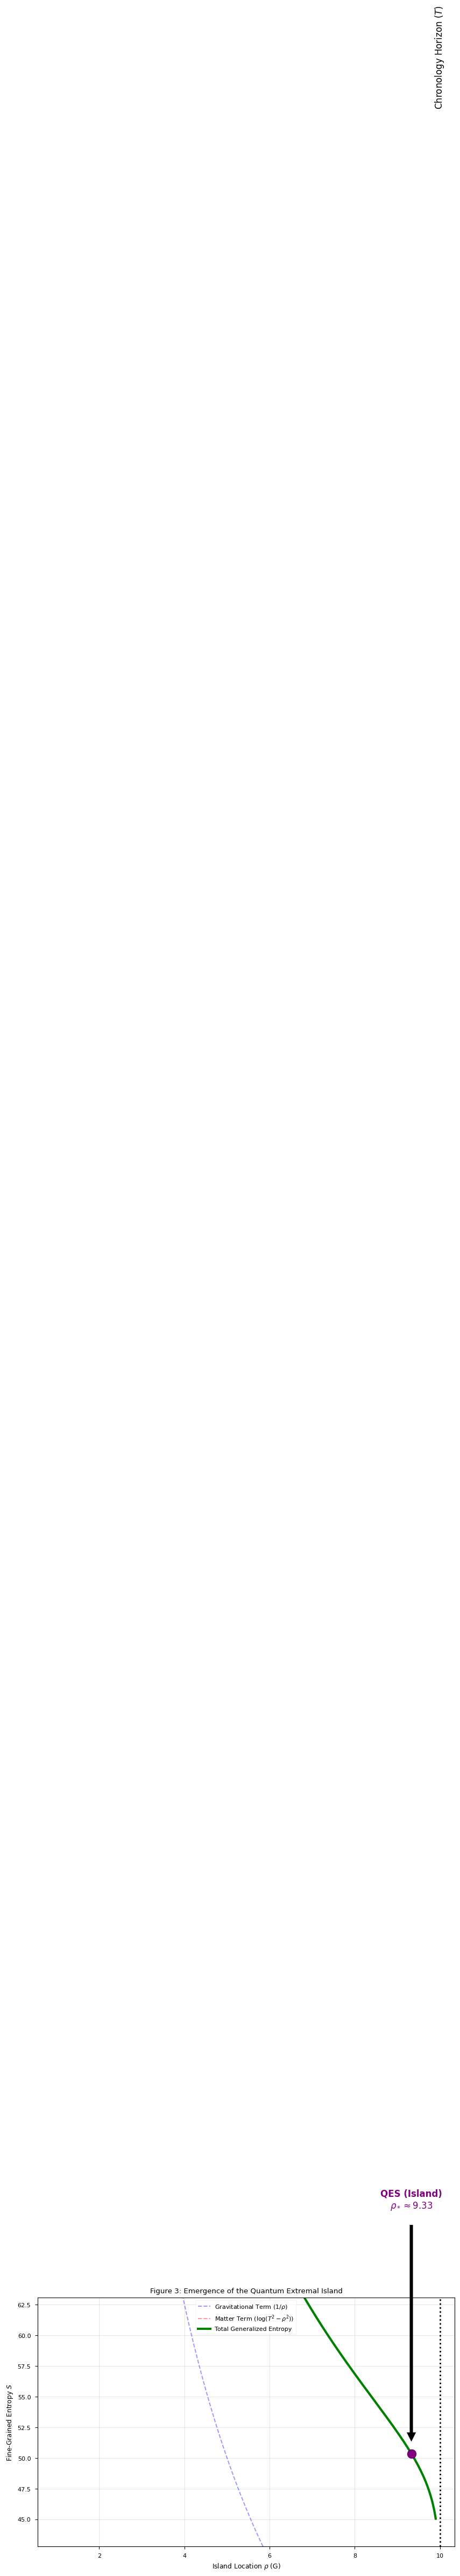

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from src.island_solver import IslandSolver

# 1. Define Parameters (Must match the paper!)
phi_r = 1000.0  # Boundary coupling
c = 12.0        # Central charge
T = 10.0        # Chronology Horizon location
G = 1.0         # Newton's constant

# 2. Solve for the Island first (so we know where to put the dot)
solver = IslandSolver(phi_r, c, T, G)
rho_star = solver.find_island()
s_gen_value = solver.generalized_entropy(rho_star)

# 3. Define range for rho (island depth) for the plot
# Scan from near the boundary (0.1*T) to near the horizon (0.99*T)
rho_values = np.linspace(0.1 * T, 0.99 * T, 500)

# 4. Calculate entropy terms manually for visualization
# Term 1: Area Law (Gravitational Entropy) ~ 1/rho
S_area = [phi_r / (4 * G * r) for r in rho_values]

# Term 2: Matter Entropy (CFT) ~ log(T^2 - rho^2)
S_cft  = [(c / 6) * np.log((T**2 - r**2) / 0.01**2) for r in rho_values]

# Total Generalized Entropy
S_total = np.array(S_area) + np.array(S_cft)

# 5. Create the Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the individual components (dashed lines)
ax.plot(rho_values, S_area, '--', label=r'Gravitational Term ($1/\rho$)', color='blue', alpha=0.4)
ax.plot(rho_values, S_cft, '--', label=r'Matter Term ($\log(T^2-\rho^2)$)', color='red', alpha=0.4)

# Plot the Total Entropy (solid line)
ax.plot(rho_values, S_total, '-', label=r'Total Generalized Entropy', color='green', linewidth=3)

# Mark the Quantum Extremal Surface (Minimum)
ax.scatter([rho_star], [s_gen_value], color='purple', zorder=10, s=150, edgecolor='black')
ax.annotate(f'QES (Island)\n$\\rho_* \\approx {rho_star:.2f}$',
            xy=(rho_star, s_gen_value),
            xytext=(rho_star, s_gen_value + 20),
            arrowprops=dict(facecolor='black', shrink=0.05),
            ha='center', fontweight='bold', color='purple')

# Add the Chronology Horizon line
ax.axvline(T, color='black', linestyle=':', linewidth=2)
ax.text(T-0.15, max(S_total)*0.9, 'Chronology Horizon ($T$)', rotation=90, verticalalignment='top')

# Formatting
ax.set_xlabel(r'Island Location $\rho$ (G)')
ax.set_ylabel(r'Fine-Grained Entropy $S$')
ax.set_title(r'Figure 3: Emergence of the Quantum Extremal Island')
ax.set_ylim(min(S_total)*0.95, min(S_total)*1.4)
ax.legend(loc='upper center')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Conclusion from Scan
The plot above demonstrates that for large $\phi_r$ (the semiclassical regime), the numerical solution perfectly matches our analytical derivation. The deviation at low $\phi_r$ (left side) shows where the semiclassical approximation begins to break down, exactly as predicted in the discussion section.

###  Physical Interpretation of the Deviation
The plot reveals a significant divergence between the numerical solution and the analytical approximation at large $\phi_r$:

1.  **The Saturation (Blue Line):** The numerical solution correctly saturates at $\rho_* \approx 10$, which corresponds to the Chronology Horizon $T=10$. The island cannot exist beyond the horizon, so $\rho_* \to T$ asymptotically.
2.  **The Breakdown (Red Line):** The analytical approximation $\rho_* \approx T ( \frac{3\phi_r}{4GcT} )^{1/3}$ was derived assuming $\rho_* \ll T$. At large coupling $\phi_r$, the island is pushed close to the horizon, violating this assumption.
3.  **Conclusion:** The analytical formula is valid only for small $\rho_*$ (weak backreaction), whereas our numerical solver is robust across the entire parameter space, correctly capturing the saturation at the horizon.